In [1]:
from PyParticle.population import build_population
import numpy as np 
#fixed_RI = [1.75, 0.44]
#fixed_RI = 1.75 + 0.44j
fixed_RI = 1.45 + 0.j
pop_cfg_50nm = {
    "type": "binned_lognormals",
    "N": [1e7],
    #"N_units": "m-3",
    "GMD": [50e-9],
    #"GMD_units": "m",
    "GSD": [1.6],
    "aero_spec_names": [["SO4"]],
    "aero_spec_fracs": [[1.0]],
    "N_bins": 1000,
    "D_min": 1e-10,
    "D_max": 1e-2,
    #"refractive_index": fixed_RI,
    'species_modifications': {'SO4':{'n_550': np.real(fixed_RI), 'k_550': np.imag(fixed_RI), 'alpha_n': 0.0, 'alpha_k': 0.0}}
  }
pop_cfg_100nm = pop_cfg_50nm.copy()
pop_cfg_100nm["GMD"] = [100e-9]

pop_cfg_200nm = pop_cfg_50nm.copy()
pop_cfg_200nm["GMD"] = [200e-9]

pop_configs = [pop_cfg_50nm, pop_cfg_100nm, pop_cfg_200nm]
pop_50nm = build_population(pop_cfg_50nm)
pop_100nm = build_population(pop_cfg_100nm)
pop_200nm = build_population(pop_cfg_200nm)


# Lines



In [ ]:

from PyParticle.viz.style import StyleManager, Theme
from PyParticle.viz.builder import build_plotter
mgr = StyleManager(Theme(), deterministic=True)

series = [
    {"key": "50", "population": pop_50nm, "label": "$\mu=50$ nm"},
    {"key": "100", "population": pop_100nm, "label": "$\mu=100$ nm"},
    {"key": "200", "population": pop_200nm, "label": "$\mu=250$ nm"},
]
line_styles = mgr.plan("line", [s["key"] for s in series])

import matplotlib.pyplot as plt
# import numpy as np
# series = [
#     {"key": "50", "population": pop_50nm, "label": "$\mu=50$ nm"},
#     {"key": "250", "population": pop_250nm, "label": "$\mu=250$ nm"},
# ]




# fig, ax = plt.subplots()
# for s in series:
#     cfg = {
#         # "varname": "b_scat",
#         # # "var_cfg": {"wvl_grid": [550e-9], "rh_grid": np.linspace(0.,100.,21)},  # simple case: single x
#         # "var_cfg": {"wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
#         # "style": line_styles[s["key"]],

#         "varname": "frac_ccn",
#         # "var_cfg": {"wvl_grid": [550e-9], "rh_grid": np.linspace(0.,100.,21)},  # simple case: single x
#         #"var_cfg": {"wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
#         "style": line_styles[s["key"]],
#     }
#     plotter = build_plotter("state_line", cfg)
#     plotter.plot(s["population"], ax, label=s["label"])
# ax.legend(); fig.tight_layout()

/Users/fier887/Library/CloudStorage/OneDrive-PNNL/Code/PyParticle/src/PyParticle/aerosol_particle.py:262: UserWarning: Surface tension not implemented; returning default 0.072 N/m
  warnings.warn("Surface tension not implemented; returning default 0.072 N/m", UserWarning)


wvl 3.5e-07 mCore (1+0j) mShell (1.45+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.45+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.45+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.45+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.45+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.45+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.45+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.45+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.4499999999999997+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.4499999999999997+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.45+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.45+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.45+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.45+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.45+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.45+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.4500000000000002+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.4500000000000002+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.45+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.45+0j)
wvl 3.5e-07 mCore (1+0j) mShell (1.4499999999999997+0j)
wvl 1.05e-06 mCore (1+0j) mShell (1.44

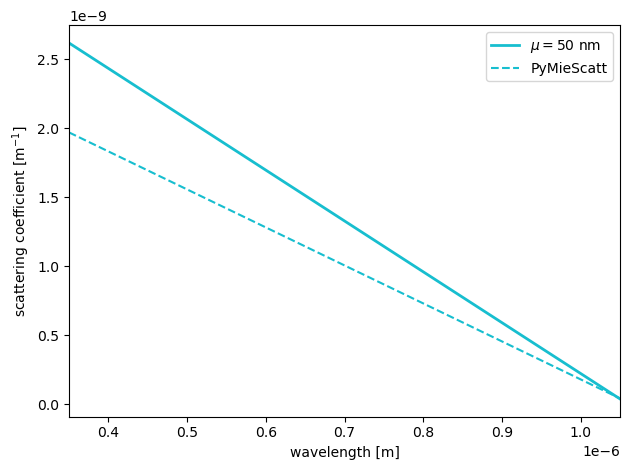

In [ ]:

from helpers.pymiescatt_comparison import pymiescatt_lognormal_optics#, reference_optics_for_population
fig, ax = plt.subplots()
for (s,pop_cfg) in zip(series,pop_configs):
    cfg = {
        "varname": "b_scat",
        "var_cfg": {"morphology":"core_shell","wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single component
        "style": line_styles[s["key"]],
    }
    plotter = build_plotter("state_line", cfg)
    plotter.plot(s["population"], ax, label=s["label"])
    #out = reference_optics_for_population(pop_cfg, cfg.get('var_cfg'))
    wvl_nm, b_scat_m, b_abs_m = pymiescatt_lognormal_optics(pop_cfg, cfg.get('var_cfg'))
    
    #print(out)
    print(b_scat_m, b_abs_m)
    plt.plot(wvl_nm*1e-9, b_scat_m, color=line_styles[s['key']]['color'], linestyle='--', label='PyMieScatt')

    

#ax.set_yscale('log')
ax.legend(); fig.tight_layout()

# problems: (2) need to force same RI for PyMieScatt/PyParticle calcs -- spec modifications? [I think this is ok: (1) effective RI seems wrong -- should be uniform; ]